In [75]:
import os
import random 
import re
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud



In [66]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

In [10]:
Dataset_location = "D:\depression_suicide_project\Pretrained_embedding_models\dataset"
CSSR_DIR = "\suicide\CSSRS"

In [15]:
CORPUS_DIR

'C:\\Users\\Teacher/Documents/mental_health/suicide/'

In [32]:
# CORPUS_DIR = os.path.expanduser('~') + '/Documents/mental_health/suicide/'
CORPUS_DIR = "D:\depression_suicide_project\Pretrained_embedding_models\dataset\suicide"
CORPUS_NAME = 'Suicide_Detection.csv'
CORPUS_PATH = CORPUS_DIR + CORPUS_NAME
PROCESSED_CORPUS = 'Suicide_Detection_processed.csv'
PICKLED_CORPUS = 'Suicide_Detection_scatter.pkl'
SCATTERTEXT_FILE = 'Reddit_ScattertextRankDataJitter.html'
CORPUS_EQUAL_CLASS = 'Suicide_Detection_processed_equal_class.csv'
CSSR_DATASET = '500_Reddit_users_posts_labels.csv'
CSSR_DIR = CORPUS_DIR + '\CSSRS'
BEST_ENTITIES = ['high school', 'mental health', 'best friend', 'feel like', 'really want', 'suicide thought',
                 'friend family']
CSSR_CAT = ['Indicator', 'Attempt','Behavior','Ideation']
CSSR_FILES = ['suicidal_indicator.csv', 'suicidal_attempt.csv', 'suicidal_behavior.csv', 'suicidal_ideation.csv']


In [41]:
CSSR_DIR

'D:\\depression_suicide_project\\Pretrained_embedding_models\\dataset\\suicide\\CSSRS'

In [34]:
Le = LabelEncoder()
lemme = WordNetLemmatizer()
stop_words_nltk = set(stopwords.words('english'))

In [38]:
def process(text):
    text = text.lower()
    text = re.sub('\W+', ' ', text)
    text = [x for x in [lemme.lemmatize(w) for w in text.split()] if x not in stop_words_nltk]
    return ' '.join(text)

def prepare_main_dataset():
    file_path = os.path.join(CSSR_DIR+'\\'+CSSR_DATASET)
    df = pd.read_csv(file_path)
    df['Post'] = df.Post.apply(lambda sample: process(sample))
    df=df.dropna()
    df.reset_index()
    df['code'] = Le.fit_transform(df['Label'])
    df.to_csv(CSSR_DIR + PROCESSED_CORPUS)
    return df

In [40]:
prepare_main_dataset()

,User,Post,Label,code
0,user-0,viable option youll leaving wife behind youd p...,Supportive,4
1,user-1,hard appreciate notion could meet someone else...,Ideation,2
2,user-2,hi last night wa sitting ledge window contempl...,Behavior,1
3,user-3,tried kill self failed badly cause moment want...,Attempt,0
4,user-4,hi nem3030 sort thing enjoy personally always ...,Ideation,2
...,...,...,...,...
495,user-495,end feel way least doesnt entire lifetime fix ...,Supportive,4
496,user-496,wa skype call ended ventricular dysfunction le...,Indicator,3
497,user-497,sound really weird maybe distractibility somet...,Supportive,4
498,user-498,dont know dumb sound feel hyperactive behavior...,Attempt,0


In [44]:
file_path = CSSR_DIR + '\\' + PROCESSED_CORPUS

In [46]:
f = pd.read_csv(file_path)

In [47]:
f.head()

,Unnamed: 0,User,Post,Label,code
0,0,user-0,viable option youll leaving wife behind youd p...,Supportive,4
1,1,user-1,hard appreciate notion could meet someone else...,Ideation,2
2,2,user-2,hi last night wa sitting ledge window contempl...,Behavior,1
3,3,user-3,tried kill self failed badly cause moment want...,Attempt,0
4,4,user-4,hi nem3030 sort thing enjoy personally always ...,Ideation,2


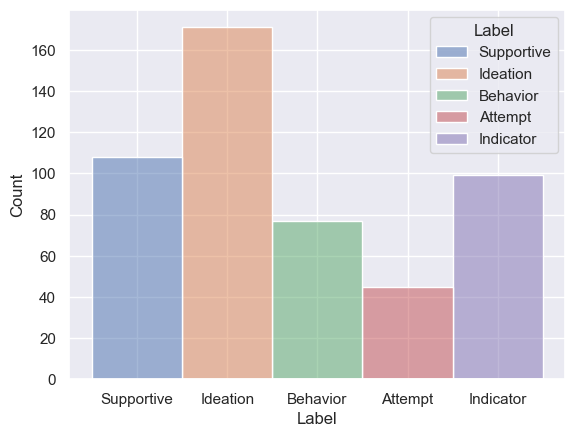

In [60]:
sns.histplot(data=f, x="Label", kde=True, hue = "Label")
plt.show()

In [64]:
f['sent_len'] = f.Post.apply(lambda x: len([w for w in str(x).split()]))

In [65]:
f

,Unnamed: 0,User,Post,Label,code,sent_len
0,0,user-0,viable option youll leaving wife behind youd p...,Supportive,4,69
1,1,user-1,hard appreciate notion could meet someone else...,Ideation,2,992
2,2,user-2,hi last night wa sitting ledge window contempl...,Behavior,1,221
3,3,user-3,tried kill self failed badly cause moment want...,Attempt,0,424
4,4,user-4,hi nem3030 sort thing enjoy personally always ...,Ideation,2,106
...,...,...,...,...,...,...
495,495,user-495,end feel way least doesnt entire lifetime fix ...,Supportive,4,552
496,496,user-496,wa skype call ended ventricular dysfunction le...,Indicator,3,227
497,497,user-497,sound really weird maybe distractibility somet...,Supportive,4,2968
498,498,user-498,dont know dumb sound feel hyperactive behavior...,Attempt,0,221


In [71]:
# transposing the rows to column
res = f.pivot(columns='Label', values='sent_len')

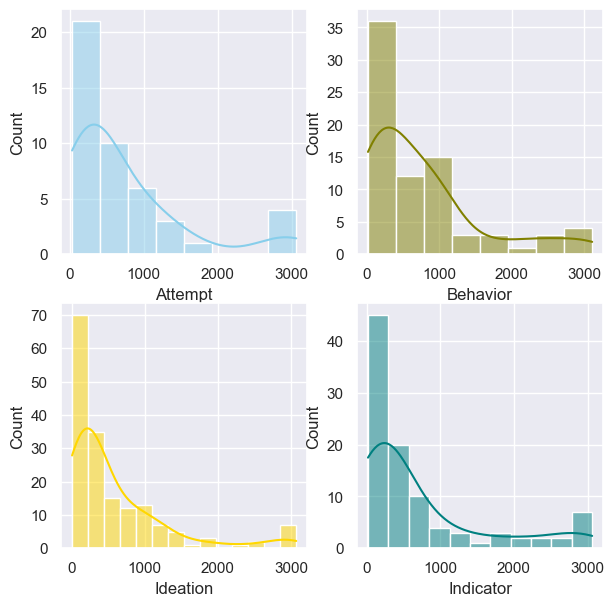

In [73]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=res, x="Attempt", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=res, x="Behavior", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=res, x="Ideation", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=res, x="Indicator", kde=True, color="teal", ax=axs[1, 1])

plt.show()

In [87]:
CSSR_CAT = ['Indicator', 'Attempt','Behavior','Ideation']
CSSR_FILES = ['suicidal_indicator.csv', 'suicidal_attempt.csv', 
              'suicidal_behavior.csv', 'suicidal_ideation.csv']

In [90]:
def gen_wordcloud(indx):
    frame = pd.read_csv(CSSR_DIR + '\\' + CSSR_FILES[indx], index_col=0)
    col_name = list(frame.columns)
    text = ' '.join(col_name)
    wc = WordCloud(width = 500, height = 300, background_color = "white", colormap = "magma", max_words = 50)
    wc.generate(text)

    plt.axis("off")
    plt.imshow(wc, interpolation = "bilinear")


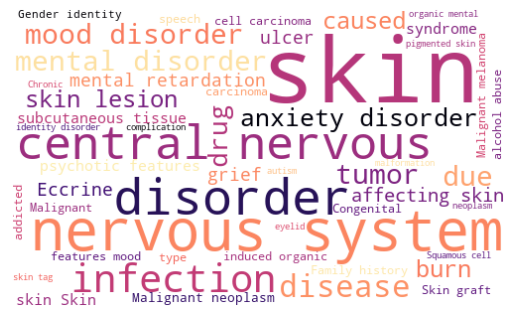

In [91]:
# Indicator
gen_wordcloud(0)

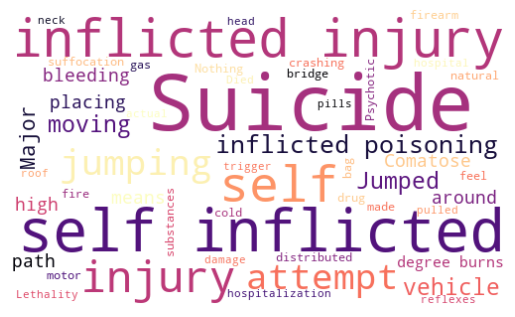

In [92]:
# Attempt
gen_wordcloud(1)

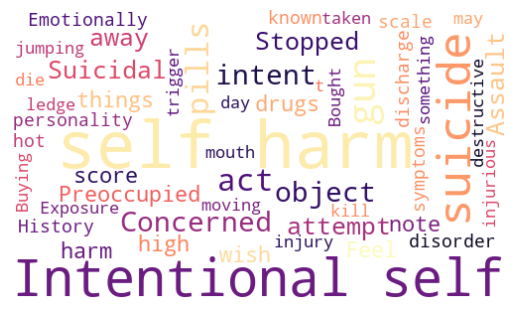

In [93]:
# Behavior
gen_wordcloud(2)

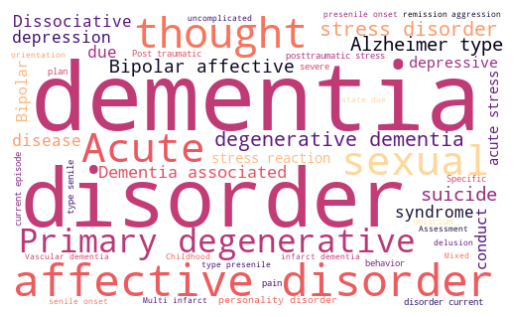

In [94]:
# Ideation
gen_wordcloud(3)

### Model building (Step 4)
#### The next step is to train the unsupervised machine learning model on the data. 
#### LdaMulticore, which uses all CPU cores to parallelize and speed up model training. 
#### Tried gensim.models.ldamodel.LdaModel class which is an equivalent, but single-core implementation.

In [ ]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers = 4, passes=10)

In [80]:
    for items in CSSR_FILES:
        frame = pd.read_csv(CSSR_DIR + '\\' + items, index_col=0)
        col_name = list(frame.columns)
        break

In [42]:


def generate_dataset(classes, res):
    data = []
    category = []
    for sample in res:
        data.append(''.join(sample))
        category.append(classes)
    return pd.DataFrame(zip(data, category), columns=['Post', 'Label'])

def generate_samples(sentence_num):
    index = 0
    dataset = pd.DataFrame()
    size = 1
    
    for items in CSSR_FILES:
        frame = pd.read_csv(CSSR_DIR + items, index_col=0)
        col_name = list(frame.columns)
        # Making the class evenly distributed
#         if index == 0:
#             size = 4
#         elif index == 1:
#             size = 52
#         elif index == 3:
#             size = 14
#         else:
#             size = 45
        for k in range(size):
            temp = [col_name[items:items + sentence_num] 
                    for items in range(0, len(col_name), sentence_num)]
            dataset = pd.concat([dataset, generate_dataset(CSSR_CAT[index], temp)])
            random.shuffle(col_name)
        index += 1
    return dataset.sample(frac=1)


def generate_dataframe(sent_size):
    x = generate_samples(sent_size)
    x = pd.concat([prepare_main_dataset(), x])
    x = x[['Post','Label','code']]
    x['code'] = Le.fit_transform(x['Label'])
    return x

In [43]:
generate_dataframe(30)

,Post,Label,code
0,viable option youll leaving wife behind youd p...,Supportive,4
1,hard appreciate notion could meet someone else...,Ideation,2
2,hi last night wa sitting ledge window contempl...,Behavior,1
3,tried kill self failed badly cause moment want...,Attempt,0
4,hi nem3030 sort thing enjoy personally always ...,Ideation,2
...,...,...,...
7,Anaplastic astrocytoma of central nervous sys...,Indicator,3
37,Neonatal staphylococcal infection of skin Per...,Indicator,3
14,Cannabis-induced anxiety disorder Psychoactiv...,Indicator,3
48,Addicted to liquor alcohol addiction alcohol ...,Indicator,3
